<a href="https://colab.research.google.com/github/uadyf/Bootcamp-2021/blob/main/tugas_akhir/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import nltk
import networkx as nx
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.cluster import KMeans
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## User

In [2]:
user = pd.read_csv('user.csv')

In [3]:
user

,userid,name,screenname,location,accountcreated,follower,friend,verified
0,892670807121330177,Ferdy Agusman,gusmanerdy,Medan,2017-08-02,6,14,0
1,277434635,Karina angelika,karigel13,between his lungs,2011-04-05,417,378,0
2,544170238,Kanjeng Sultan,ayiekkresna,"Kota Surabaya, Jawa Timur",2012-04-03,590,333,0
3,1356180001888976899,UrExtacy,6hndrd6ty6,Bikini Bottom,2021-02-01,2,114,0
4,1168873359741874176,bela,twingkerbelll,Indonesia,2019-09-03,42,48,0
...,...,...,...,...,...,...,...,...
1995,1356663513024880641,Dania Putri,DaniaPu19568142,Indonesia,2021-02-02,5,0,0
1996,1270945722259529728,AL,rohfakboi,Indonesia,2020-06-11,34,105,0
1997,1291683283516850178,Rexsy Aprino Sanggen,rexsy_aprino,"Central Borneo, Indonesia",2020-08-07,5,5,0
1998,1011527885876654080,pijat panggilan,SpaPanggilan,"surabaya, malang, palembang,",2018-06-26,2072,222,0


Berapa banyak akun verified yang merespon kasus Rachel Vennya

In [5]:
respond_verified = user[user['verified'] == 1]
for i in range(len(respond_verified.values)):
  print(f'Nama Akun Verified: {respond_verified.values[0][1]}')

Nama Akun Verified: IDN Times


Berapa banyak follower setiap user yang merespon kasus Rachel Vennya?

In [12]:
sorted

,userid,name,screenname,location,accountcreated,follower,friend,verified
381,388190238,IDN Times,idntimes,Indonesia,2011-10-10,406772,287,1
188,1226278445560152065,ON - SQUIDWARDFESS,squidwardfess,INDONESIA,2020-02-08,251621,10312,0
393,1021386038,Lituhayu,Paranggendis,selangkangan dajjal,2012-12-19,31111,59,0
1974,2843878393,meita liem,meita_liem,"Kota Surabaya, Jawa Timur",2014-10-07,26264,2297,0
1504,39716466,ronitoxid paranoid,ronitoxid,Salatiga - Jakarta - London,2009-05-13,15996,644,0
...,...,...,...,...,...,...,...,...
1816,1356674373692739585,.,doubleyouaidi,Indonesia,2021-02-02,0,2,0
1822,1332383303861641216,Ri Zani,RiZani197,Indonesia,2020-11-27,0,3,0
1012,1357321998091755521,Caramoy💞,caramoy55319401,"Bogor Selatan, Indonesia",2021-02-04,0,0,0
1908,1324255970768269313,indavara,youbemine2671,"Medan Baru, Indonesia",2020-11-05,0,18,0


In [ ]:
sorted = user.sort_values(by=['follower'], ascending=False)
mean = [730,730,730,730,730,730,730,730,730]

fig, ax = plt.subplots(figsize=(6,2))
ax.bar(sorted['name'].values[:10], sorted['follower'].values[:10], zorder=3)
ax.grid(zorder=0)
ax.set_title('9 User dengan Follower Teratas')
ax.set_xlabel('Nama Akun')
ax.set_ylabel('Jumlah Follower')
ax.plot(mean, linewidth=5, color='r')
plt.xticks(rotation=90)
plt.plot()

tahun berapa akun user yang merespon kasus Rachel Vennya?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f692532e470>],
      dtype=object)

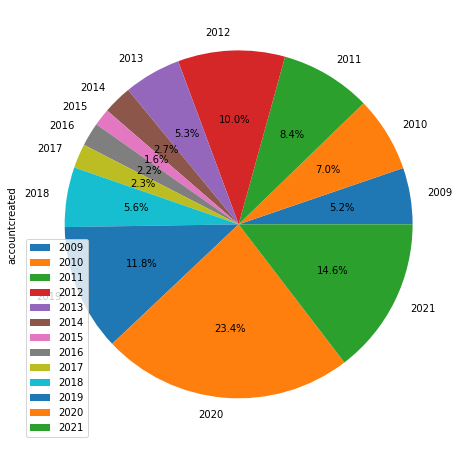

In [6]:
sorted['accountcreated'] = pd.to_datetime(sorted['accountcreated'])
new_year = pd.DataFrame({'accountcreated':sorted['accountcreated'].dt.year})
group = new_year.groupby('accountcreated')['accountcreated'].count()
group_year_df = pd.DataFrame(group)
group_year_df.rename({'accountcreated':'count'}, axis=1)
group_year_df.plot.pie(autopct="%.1f%%", subplots=True, figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f692498eda0>],
      dtype=object)

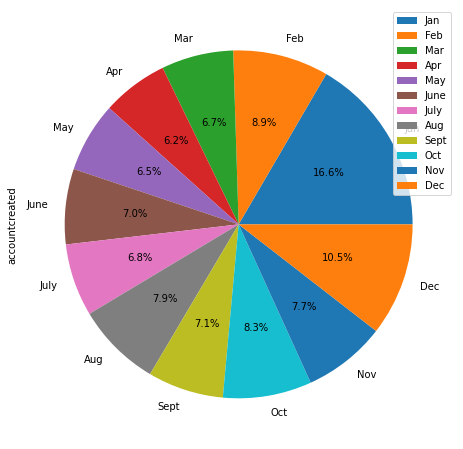

In [13]:
new_month = pd.DataFrame({'accountcreated':sorted['accountcreated'].dt.month})
group = new_month.groupby('accountcreated')['accountcreated'].count()
group_month_df = pd.DataFrame(group)
group_month_df.rename(index={1:'Jan',
                        2:'Feb',
                        3:'Mar',
                        4:'Apr',
                        5:'May',
                        6:'June',
                        7:'July',
                        8:'Aug',
                        9:'Sept',
                        10:'Oct',
                        11:'Nov',
                        12:'Dec'}, inplace=True)
group_month_df.rename({'accountcreated':'count'}, axis=1)
group_month_df.plot.pie(autopct="%.1f%%", subplots=True, figsize=(12,8))

In [12]:
group_month_df.rename(index={1:'Jan',
                        2:'Feb',
                        3:'Mar',
                        4:'Apr',
                        5:'May',
                        6:'June',
                        7:'July',
                        8:'Aug',
                        9:'Sept',
                        10:'Oct',
                        11:'Nov',
                        12:'Dec'}, inplace=True)

,accountcreated
accountcreated,
Jan,332
Feb,178
Mar,134
Apr,123
May,130
June,140
July,135
Aug,158
Sept,141


## Tweet

In [14]:
tweet = pd.read_csv('tweet_clean.csv')

In [15]:
tweet

,tweetid,createddate,tweet
0,1357479018472239104,2021-02-04,orang belajar rachel vennya belajar orang bela...
1,1357478833725845507,2021-02-04,rachel vennya jd inget raditya dikamenikahlah ...
2,1357478819456720896,2021-02-04,berhasil netizen belajar rachel vennya bikin les
3,1357478818701733888,2021-02-04,rachel vennya belajar as long as ure in relati...
4,1357478707884032001,2021-02-04,cerita rachel vennya okin membawaku mengeluark...
...,...,...,...
508,1357367144271417346,2021-02-04,dituduh selingkuh malamjumat
509,1357367049484263425,2021-02-04,selingkuh enak rt setuju
510,1357367016961802240,2021-02-04,khaaa selingkuh gimana jomblo
511,1357366907872047104,2021-02-04,gapapa wajar musim musim ujan gini selingkuh


15 kata terbanyak

[('selingkuh', 372), ('rachel', 141), ('vennya', 139), ('yg', 88), ('belajar', 76), ('ga', 61), ('aja', 51), ('ya', 36), ('malamjumat', 35), ('gak', 30), ('orang', 29), ('kalo', 28), ('gw', 27), ('udah', 24), ('sih', 22)]


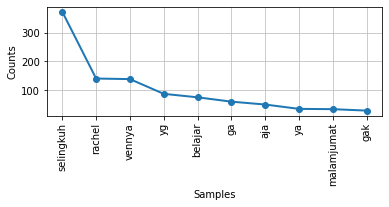

In [29]:
isi = tweet['tweet'].values
value = isi.tolist()

token = [word_tokenize(paragraf) for paragraf in value]
token = list(itertools.chain(*token))
freq = FreqDist(token)
print(freq.most_common(15))
plt.figure(figsize=(6,2))
freq.plot(10, marker='o')
plt.show()

bermain dengan wordcloud

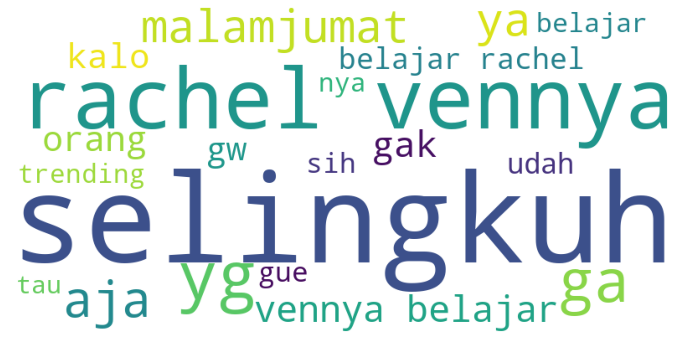

In [44]:
sentence = ' '.join(token)
cloud = WordCloud(width=800, height=400, max_words=20,background_color='white', max_font_size=150).generate(sentence)
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

berapa banyak orang yang mengatakan belajar dari rachel vennya?

In [54]:
token2 = token = [word_tokenize(paragraf) for paragraf in value]
count = 0
comb = ['belajar', 'rachel', 'vennya']
for txt in token2:
  for i in txt:
    if i in comb:
      count += 1
count

356